In [1]:
import numpy as np   
import pandas as pd    
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import matplotlib.pyplot as plt   
import matplotlib.style
%matplotlib inline

In [2]:
df=pd.read_csv('cubic_zirconia.csv')

In [3]:
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
0,1,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,2,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,3,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,4,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,5,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


In [4]:
df.shape

(26967, 11)

In [5]:
df.dtypes 

Unnamed: 0      int64
carat         float64
cut            object
color          object
clarity        object
depth         float64
table         float64
x             float64
y             float64
z             float64
price           int64
dtype: object

In [6]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Unnamed: 0,26967,NaN,NaN,NaN,13484,7784.85,1,6742.5,13484,20225.5,26967
carat,26967,NaN,NaN,NaN,0.798375,0.477745,0.2,0.4,0.7,1.05,4.5
cut,26967,5,Ideal,10816,NaN,NaN,NaN,NaN,NaN,NaN,NaN
color,26967,7,G,5661,NaN,NaN,NaN,NaN,NaN,NaN,NaN
clarity,26967,8,SI1,6571,NaN,NaN,NaN,NaN,NaN,NaN,NaN
depth,26270,NaN,NaN,NaN,61.7451,1.41286,50.8,61,61.8,62.5,73.6
table,26967,NaN,NaN,NaN,57.4561,2.23207,49,56,57,59,79
x,26967,NaN,NaN,NaN,5.72985,1.12852,0,4.71,5.69,6.55,10.23
y,26967,NaN,NaN,NaN,5.73357,1.16606,0,4.71,5.71,6.54,58.9
z,26967,NaN,NaN,NaN,3.53806,0.720624,0,2.9,3.52,4.04,31.8


In [7]:
df.columns

Index(['Unnamed: 0', 'carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x',
       'y', 'z', 'price'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26967 entries, 0 to 26966
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  26967 non-null  int64  
 1   carat       26967 non-null  float64
 2   cut         26967 non-null  object 
 3   color       26967 non-null  object 
 4   clarity     26967 non-null  object 
 5   depth       26270 non-null  float64
 6   table       26967 non-null  float64
 7   x           26967 non-null  float64
 8   y           26967 non-null  float64
 9   z           26967 non-null  float64
 10  price       26967 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 2.3+ MB


The original dataset has missing values. It has 3 Object datatypes, 6 float and 2 int64 variables

In [9]:
# Check for duplicate data

dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

df[dups]

Number of duplicate rows = 0


,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price


There are no duplicates present in the dataset

In [10]:
# null value check
print('Number of Null value Rows = %d{}' .format(df.isna().sum()))

Number of Null value Rows = %dUnnamed: 0      0
carat           0
cut             0
color           0
clarity         0
depth         697
table           0
x               0
y               0
z               0
price           0
dtype: int64


'Depth' column has 697 missing values, other columns have no missing values. Before building the model the missing values have to be dropped from the dataset

In [11]:
df=df.dropna()

In [12]:
df.shape

(26270, 11)

After dropping the missing values count 697, the shape of the dataset has changed to (Rows: 26270 , Columns: 11) from (26967, 11)

In [13]:
dfd=df.drop(['Unnamed: 0'],axis=1)
dfd.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y', 'z',
       'price'],
      dtype='object')

# Univariate Analysis

In [14]:
from scipy.stats import skew
for column in dfd.columns:
    if dfd[column].dtype != 'object':
        print('\n Skewness of',column,': ',skew(dfd[column]))


 Skewness of carat :  1.117688359567716

 Skewness of depth :  -0.028616421040645105

 Skewness of table :  0.7686814656119176

 Skewness of x :  0.38731881697027615

 Skewness of y :  3.93929233731628

 Skewness of z :  0.3648073463317343

 Skewness of price :  1.6199469874625374


Skewness assesses the extent to which a variable’s distribution is symmetrical.
Skewness of depth, x, z is between -0.5 to 0.5, indicates that the data is fairly symmetrical.
Skewness of carat, y and price is more than 1,indicates that the data is highly skewed to right.
Skewness of table is between 0.5 and 1, the data are moderately skewed.

In [15]:
from scipy.stats import kurtosis
for column in dfd.columns:
    if dfd[column].dtype != 'object':
        print('\n Kurtosis of',column,': ',kurtosis(dfd[column]))


 Kurtosis of carat :  1.2281660266810714

 Kurtosis of depth :  3.6735028620292898

 Kurtosis of table :  1.5829639923577359

 Kurtosis of x :  -0.6542651883364003

 Kurtosis of y :  163.3630736178029

 Kurtosis of z :  -0.4539599096795288

 Kurtosis of price :  2.1569146818207496


Kurtosis is a measure of whether the distribution is too peaked (a very narrow distribution with most of the responses in the center).
Positive values (carat,depth,table,price,y) of kurtosis indicate that a distribution is peaked and possess thick tails.
If the kurtosis is less than zero, then the distribution is light tailed (x,z)
An extreme positive kurtosis indicates a distribution where more of the values are located in 
the tails of the distribution rather than around the mean.

C:\Users\kpriyadh\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\kpriyadh\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\kpriyadh\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\kpriyadh\Anac

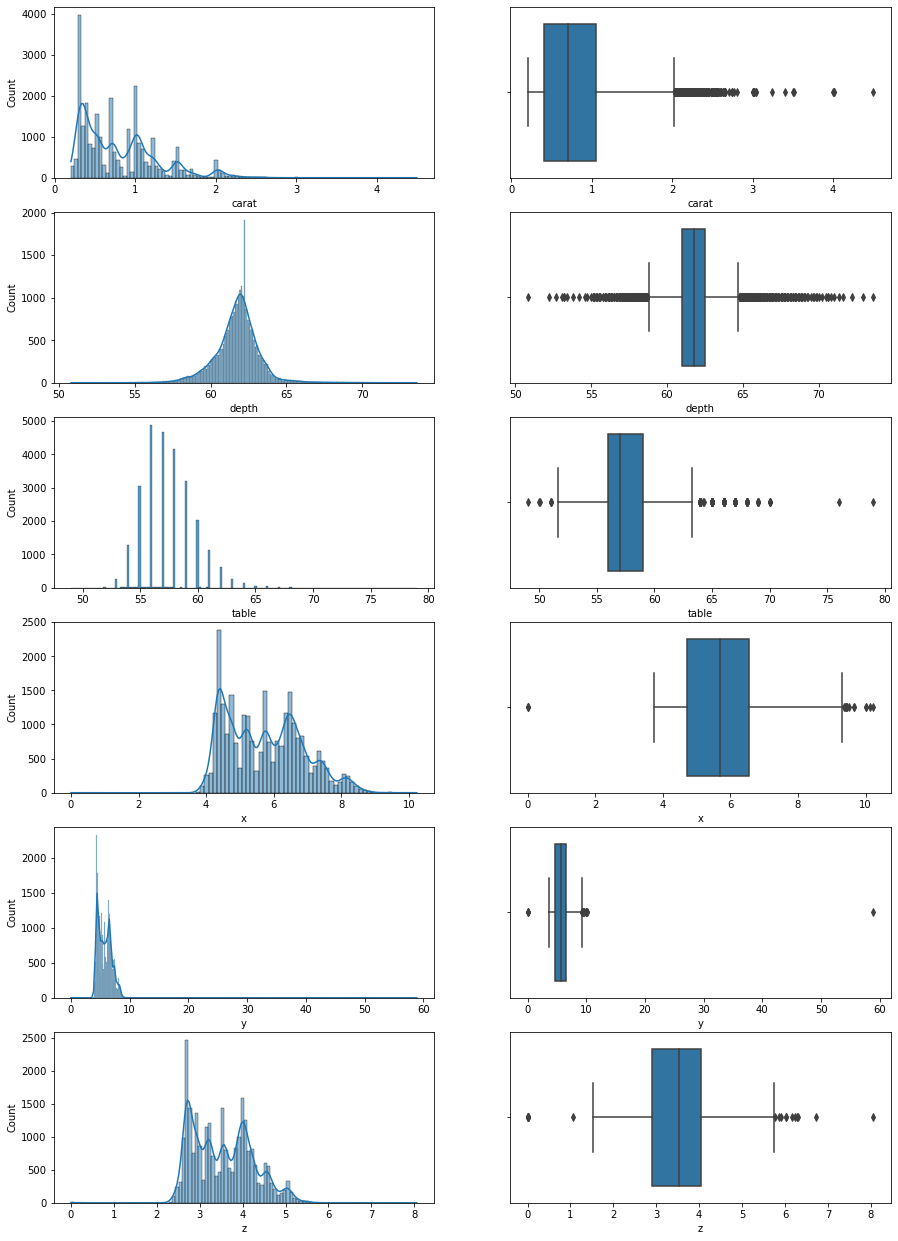

In [16]:
fig, axes = plt.subplots(nrows=6,ncols=2)
fig.set_size_inches(15,22)
sns.histplot(df['carat'], kde=True, ax=axes[0][0])
sns.boxplot(x=df['carat'],data=df,ax=axes[0][1])
sns.histplot(df['depth'], kde=True, ax=axes[1][0])
sns.boxplot(x=df['depth'],data=df,ax=axes[1][1])
sns.histplot(x=df['table'],data=df,ax=axes[2][0])
sns.boxplot(df['table'],data=df, ax=axes[2][1])
sns.histplot(x='x', data=df , kde=True,ax=axes[3][0])
sns.boxplot(df['x'],data=df, ax=axes[3][1])
sns.histplot(df['y'], kde=True, ax=axes[4][0])
sns.boxplot(df['y'],data=df, ax=axes[4][1])
sns.histplot(x='z', data=df , kde=True,ax=axes[5][0])
sns.boxplot(df['z'],data=df, ax=axes[5][1])
plt.show()

<AxesSubplot:xlabel='price', ylabel='Count'>

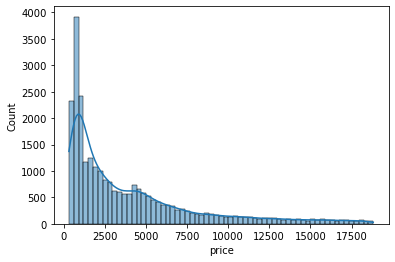

In [17]:
sns.histplot(df['price'], kde=True)

C:\Users\kpriyadh\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='price'>

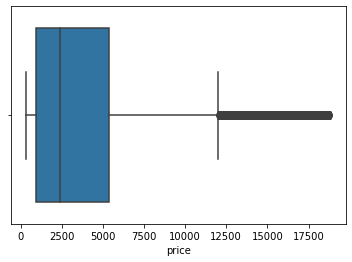

In [18]:
sns.boxplot(df['price'],data=df)

C:\Users\kpriyadh\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='price'>

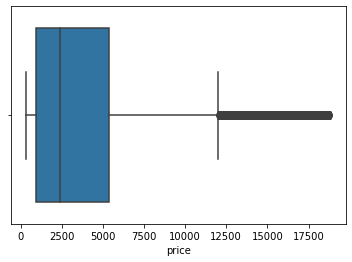

In [19]:
sns.boxplot(df['price'],data=df)

Observations from Univariate Analysis:

It has 3 Object datatypes, 6 float and 2 int64 variables and label encoding has to be performed to categorical variables to perform regression.
Outliers are present in all the variables and presence of outliers to be treated 
Data is Normally distributed with slight skew for almost all features 

### Unique values for categorical variables

In [20]:
for column in df.columns:
    if df[column].dtype == 'object':
        print(column.upper(),': ',df[column].nunique())
        print(df[column].value_counts().sort_values())
        print('\n')

CUT :  5
Fair           757
Good          2382
Very Good     5878
Premium       6707
Ideal        10546
Name: cut, dtype: int64


COLOR :  7
J    1401
I    2676
D    3268
H    3991
F    4612
E    4793
G    5529
Name: color, dtype: int64


CLARITY :  8
I1       355
IF       874
VVS1    1791
VVS2    2479
VS1     3991
SI2     4447
VS2     5925
SI1     6408
Name: clarity, dtype: int64




# Bivariate Analysis

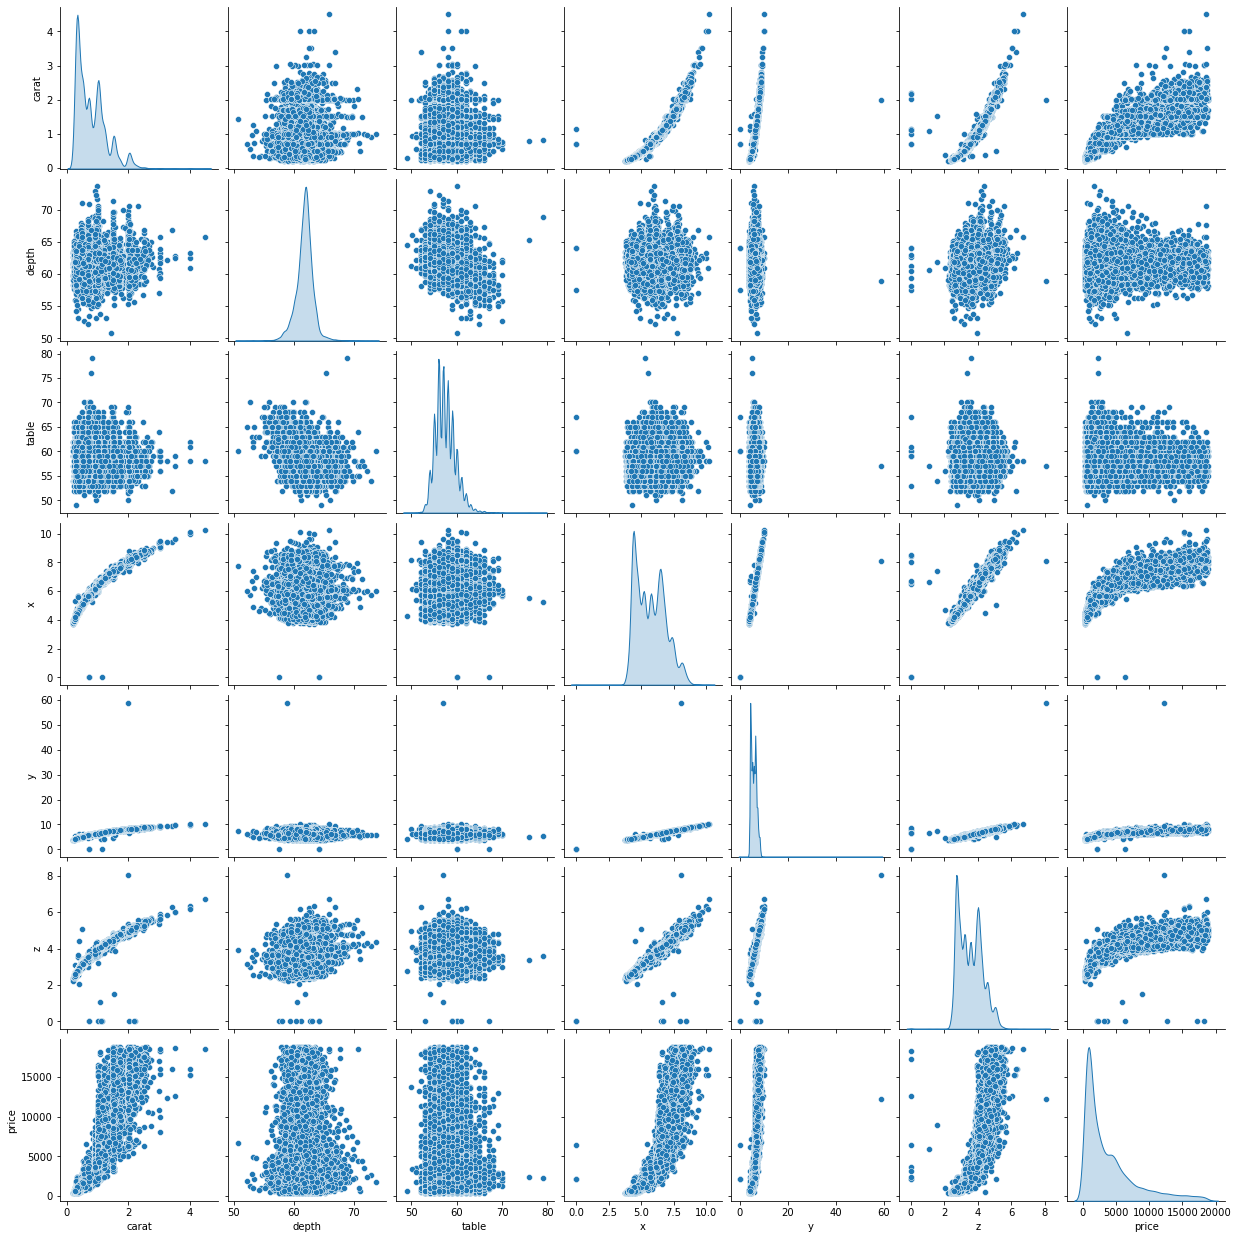

In [21]:
cont=dfd.dtypes[(df.dtypes!='object')].index
df_attr = (dfd[cont])
sns.pairplot(df_attr, diag_kind='kde',palette='bright',markers=all)  
plt.show()

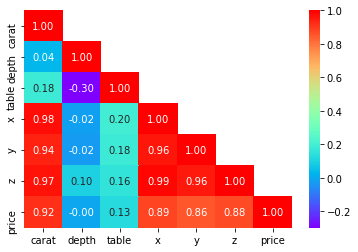

In [22]:
sns.heatmap(df[cont].corr(),annot=True,fmt='.2f',cmap='rainbow',mask=np.triu(df[cont].corr(),+1))
plt.show()

<AxesSubplot:xlabel='cut', ylabel='count'>

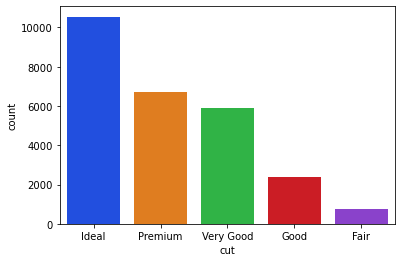

In [23]:
sns.countplot(x=dfd['cut'], palette='bright',)

The count of 'Ideal' category in 'Cut' variable is the maximum and 'Fair' category count is minimum

<AxesSubplot:xlabel='color', ylabel='count'>

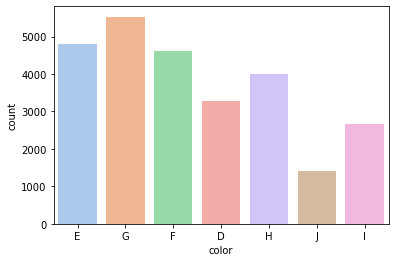

In [24]:
sns.countplot(x=dfd['color'], palette='pastel',)

The count of 'G' category in 'Color' variable is the maximum and 'J' category count in 'Color' variable is minimum

<AxesSubplot:xlabel='clarity', ylabel='count'>

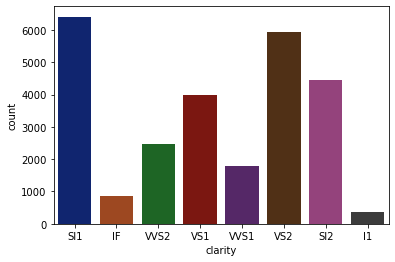

In [25]:
sns.countplot(x=dfd['clarity'], palette='dark',)

The count of 'SI1' category in 'Clarity' variable is the maximum and 'I1' category count in 'Clarity' variable is minimum

In [26]:
dfd['clarity'].value_counts(normalize=True)

SI1     0.243928
VS2     0.225542
SI2     0.169281
VS1     0.151922
VVS2    0.094366
VVS1    0.068177
IF      0.033270
I1      0.013514
Name: clarity, dtype: float64

In [27]:
dfd['color'].value_counts(normalize=True)

G    0.210468
E    0.182451
F    0.175561
H    0.151922
D    0.124400
I    0.101865
J    0.053331
Name: color, dtype: float64

In [28]:
dfd['cut'].value_counts(normalize=True)

Ideal        0.401447
Premium      0.255310
Very Good    0.223753
Good         0.090674
Fair         0.028816
Name: cut, dtype: float64

### Bivariate Analysis

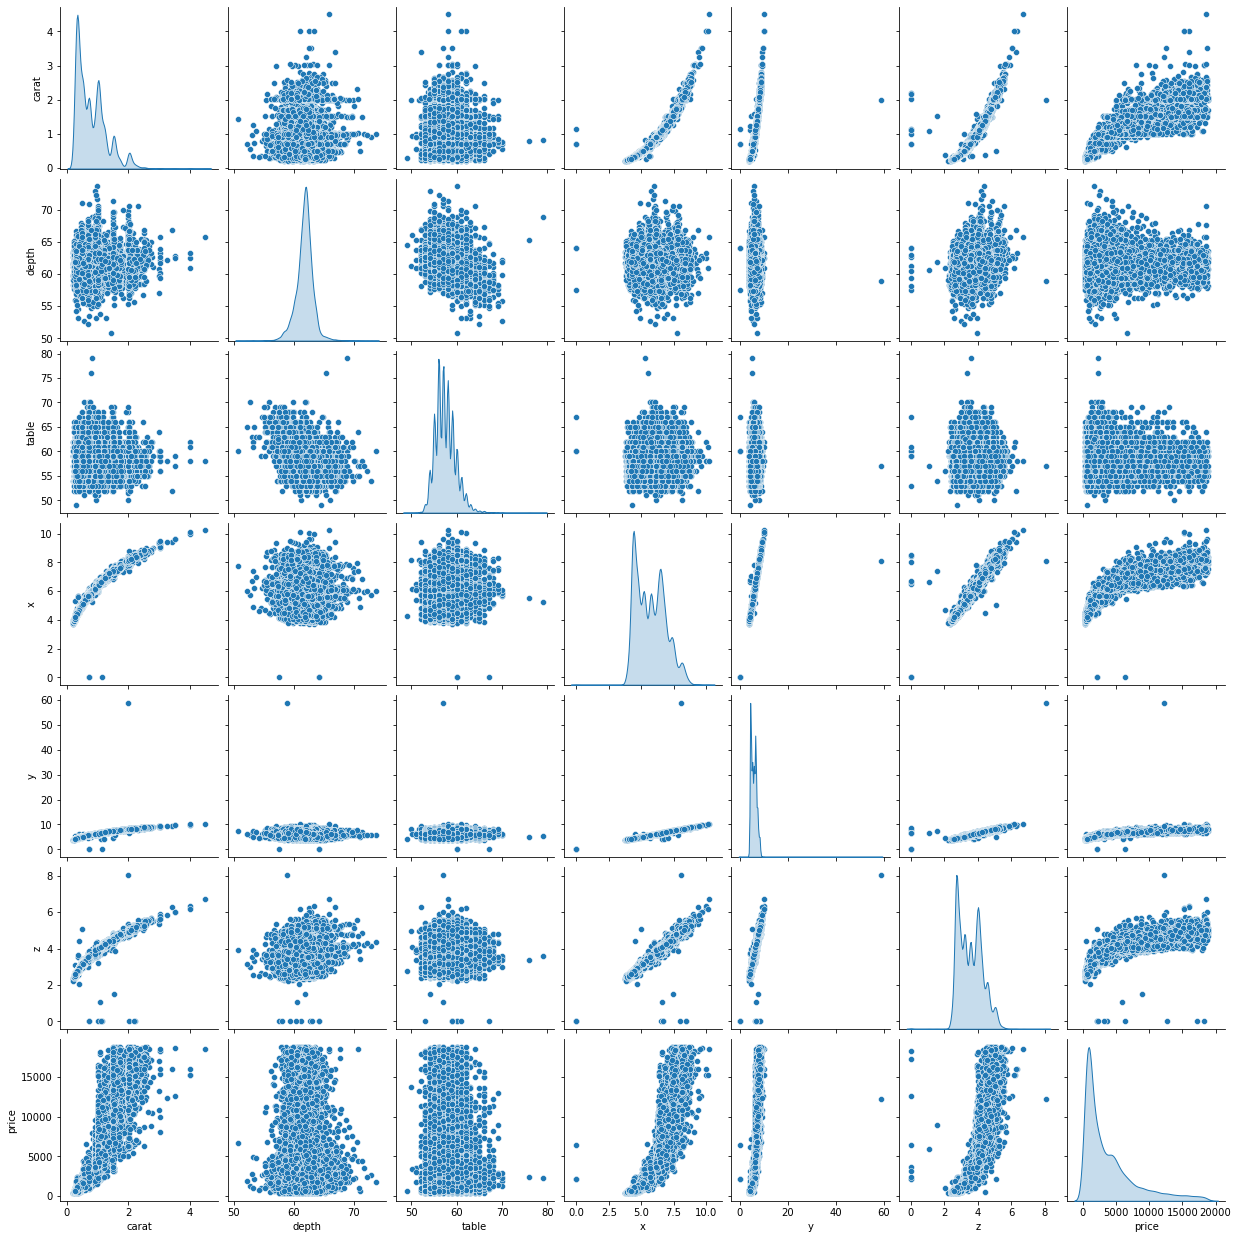

In [29]:
cont=dfd.dtypes[(df.dtypes!='object')].index
df_attr = (dfd[cont])
sns.pairplot(df_attr, diag_kind='kde',palette='bright',markers=all)  
plt.show()

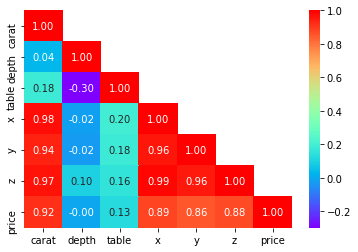

In [30]:
sns.heatmap(df[cont].corr(),annot=True,fmt='.2f',cmap='rainbow',mask=np.triu(df[cont].corr(),+1))
plt.show()

X, Y, Z, Price & Carat has good co-relation ; 
table and depth has poor co-relation

### Box Plot with Outliers

C:\Users\kpriyadh\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\kpriyadh\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\kpriyadh\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\kpriyadh\Anac

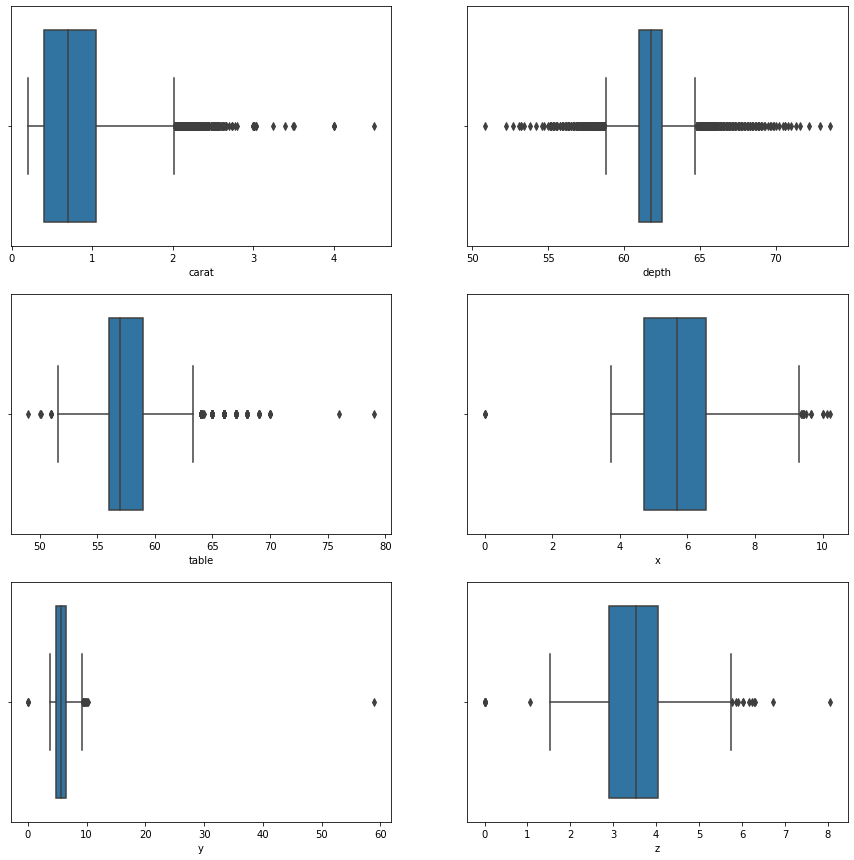

In [31]:
# construct box plot for continuous variables
fig, axes = plt.subplots(nrows=3,ncols=2)
fig.set_size_inches(15,15)
sns.boxplot(x=df['carat'],data=df,ax=axes[0][0])
sns.boxplot(x=df['depth'],data=df,ax=axes[0][1])
sns.boxplot(df['table'],data=df,ax=axes[1][0])
sns.boxplot(df['x'],data=df,ax=axes[1][1])
sns.boxplot(df['y'],data=df,ax=axes[2][0])
sns.boxplot(df['z'],data=df,ax=axes[2][1])
plt.show()

# Outlier Removal

In [32]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [33]:
for column in df.columns:
    if df[column].dtype != 'object':
        lr,ur=remove_outlier(df[column])
        df[column]=np.where(df[column]>ur,ur,df[column])
        df[column]=np.where(df[column]<lr,lr,df[column])

### Box Plot without Outliers

C:\Users\kpriyadh\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\kpriyadh\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\kpriyadh\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\kpriyadh\Anac

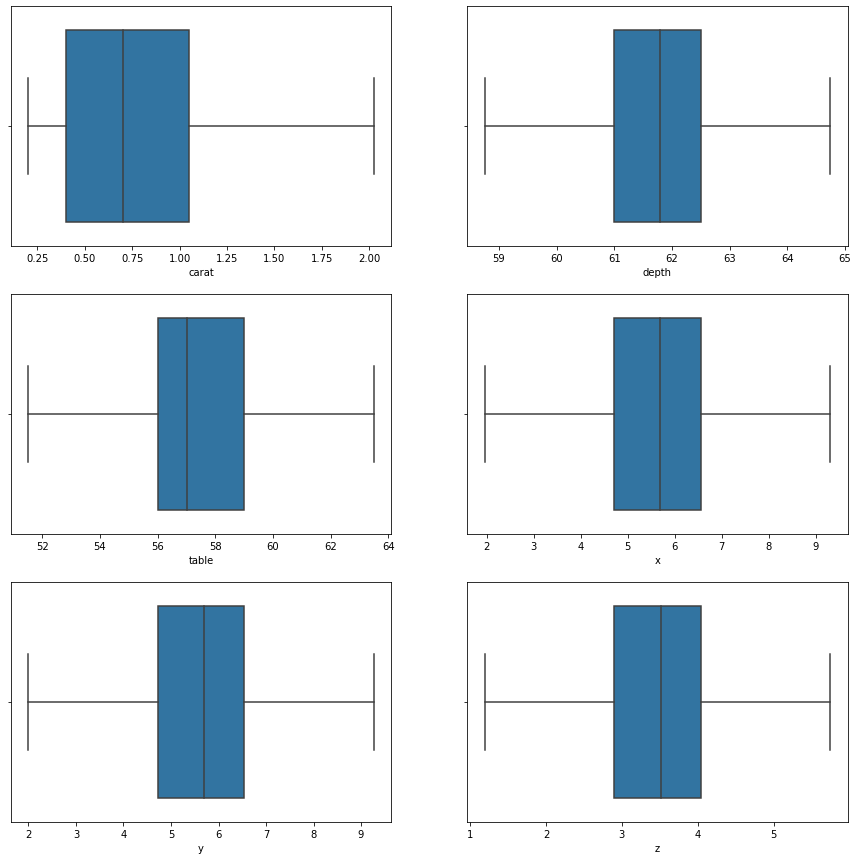

In [34]:
fig, axes = plt.subplots(nrows=3,ncols=2)
fig.set_size_inches(15,15)
sns.boxplot(x=df['carat'],data=df,ax=axes[0][0])
sns.boxplot(x=df['depth'],data=df,ax=axes[0][1])
sns.boxplot(df['table'],data=df,ax=axes[1][0])
sns.boxplot(df['x'],data=df,ax=axes[1][1])
sns.boxplot(df['y'],data=df,ax=axes[2][0])
sns.boxplot(df['z'],data=df,ax=axes[2][1])
plt.show()

### Converting categorical to dummy variables

In [35]:
df = pd.get_dummies(df, columns=['cut','color','clarity'],drop_first=True)

In [36]:
df.head()

,Unnamed: 0,carat,depth,table,x,y,z,price,cut_Good,cut_Ideal,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,1.0,0.30,62.1,58.0,4.27,4.29,2.66,499.0,0,1,...,0,0,0,0,1,0,0,0,0,0
1,2.0,0.33,60.8,58.0,4.42,4.46,2.70,984.0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,3.0,0.90,62.2,60.0,6.04,6.12,3.78,6289.0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,4.0,0.42,61.6,56.0,4.82,4.80,2.96,1082.0,0,1,...,0,0,0,0,0,0,1,0,0,0
4,5.0,0.31,60.4,59.0,4.35,4.43,2.65,779.0,0,1,...,0,0,0,0,0,0,0,0,1,0


In [37]:
## Train-Test Split

In [38]:
# Copy all the predictor variables into X dataframe
X = df.drop('price', axis=1)

# Copy target into the y dataframe. 
y = df[['price']]

In [39]:
# Split X and y into training and test set in 70:30 ratio
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3 , random_state=1)

In [40]:
## Linear Regression Model

regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression()

In [41]:
# Let us explore the coefficients for each of the independent attributes

for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for Unnamed: 0 is -0.00048148441026179254
The coefficient for carat is 9040.40666355195
The coefficient for depth is -6.619651396943221
The coefficient for table is -22.590244908160226
The coefficient for x is -1144.7319625875748
The coefficient for y is 921.0243423173067
The coefficient for z is -324.6621284750098
The coefficient for cut_Good is 415.9357310688661
The coefficient for cut_Ideal is 632.3617780090086
The coefficient for cut_Premium is 623.8505219640028
The coefficient for cut_Very Good is 523.3642372466684
The coefficient for color_E is -201.57366272153732
The coefficient for color_F is -270.72695093214844
The coefficient for color_G is -438.98745837727137
The coefficient for color_H is -874.2764131288081
The coefficient for color_I is -1341.20895996173
The coefficient for color_J is -1901.4941682600345
The coefficient for clarity_IF is 4133.514555197883
The coefficient for clarity_SI1 is 2630.7307270008755
The coefficient for clarity_SI2 is 1815.751478675

In [42]:
# Let us check the intercept for the model

intercept = regression_model.intercept_[0]
print("The intercept for our model is {}".format(intercept))

The intercept for our model is -2264.0138099777446


In [43]:
# R square on training data
print('R square on training data is {}'.format(regression_model.score(X_train, y_train)))

R square on training data is 0.9405460602987309



R-squared is the percentage of the dependent variable variation that a linear model explains.
R-squared is a goodness-of-fit measure for linear regression models. This statistic indicates the percentage of the variance in the dependent variable that the independent variables explain collectively.
94% of the variation in the Price is explained by the predictors in the model for train set.


In [44]:
# R square on test data
print('R square on test data is {}'.format(regression_model.score(X_test, y_test)))

R square on test data is 0.9403861399640809


94% of the variation in the Price is explained by the predictors in the model for test set.

In [45]:
#RMSE on Training data
predicted_train=regression_model.fit(X_train, y_train).predict(X_train)
print('RMSE on training data is {}'.format(np.sqrt(metrics.mean_squared_error(y_train,predicted_train))))

RMSE on training data is 846.8383643580527


Root Mean Square Error (RMSE) is the standard deviation of the residuals (prediction errors). 
Residuals are a measure of how far from the regression line data points are; 
RMSE is a measure of how spread out these residuals are.

In [46]:
#RMSE on Testing data
predicted_test=regression_model.fit(X_train, y_train).predict(X_test)
print('RMSE on test data is {}'.format(np.sqrt(metrics.mean_squared_error(y_test,predicted_test))))

RMSE on test data is 844.4398851317088


RMSE values between the Training data and Testing data are the same. 
The model is a good fit model. 

# Linear Regression using statsmodels

In [47]:
# concatenate X and y into a single dataframe
data_train = pd.concat([X_train, y_train], axis=1)
data_test=pd.concat([X_test,y_test],axis=1)
data_train.head()

,Unnamed: 0,carat,depth,table,x,y,z,cut_Good,cut_Ideal,cut_Premium,...,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2,price
19314,19315.0,0.400,59.2,59.0,4.79,4.81,2.84,0,0,1,...,0,0,0,0,0,1,0,0,0,1123.0
506,507.0,1.500,61.7,62.0,7.28,7.24,4.48,0,0,1,...,0,0,0,0,0,0,0,0,0,6300.0
1222,1223.0,0.600,62.1,56.0,5.40,5.45,3.37,0,1,0,...,0,0,0,0,0,0,1,0,0,1795.0
17203,17204.0,1.200,61.7,56.0,6.79,6.87,4.21,0,1,0,...,0,1,0,0,1,0,0,0,0,4659.0
23277,23278.0,2.025,62.7,57.0,8.19,8.09,5.10,0,1,0,...,0,0,0,0,1,0,0,0,0,11985.0


In [48]:
data_train.rename(columns = {"cut_Very Good": "cut_Very_Good"}, inplace = True)
                       
data_test.rename(columns = {"cut_Very Good": "cut_Very_Good"}, inplace = True)

In [49]:
data_train.columns

Index(['Unnamed: 0', 'carat', 'depth', 'table', 'x', 'y', 'z', 'cut_Good',
       'cut_Ideal', 'cut_Premium', 'cut_Very_Good', 'color_E', 'color_F',
       'color_G', 'color_H', 'color_I', 'color_J', 'clarity_IF', 'clarity_SI1',
       'clarity_SI2', 'clarity_VS1', 'clarity_VS2', 'clarity_VVS1',
       'clarity_VVS2', 'price'],
      dtype='object')

In [50]:
expr= 'price ~ carat + depth + table + x + y + z + cut_Good + cut_Ideal + cut_Premium + cut_Very_Good + color_E + color_F + color_G + color_H + color_I + color_J + clarity_IF + clarity_SI1 + clarity_SI2 + clarity_VS1 + clarity_VS2 + clarity_VVS1 + clarity_VVS2'

In [51]:
import statsmodels.formula.api as smf
lm1 = smf.ols(formula= expr, data = data_train).fit()
lm1.params

Intercept       -2271.641097
carat            9040.797131
depth              -6.601049
table             -22.584500
x               -1145.176472
y                 921.558060
z                -325.052644
cut_Good          416.063726
cut_Ideal         632.449256
cut_Premium       623.826734
cut_Very_Good     523.373980
color_E          -201.644601
color_F          -270.787976
color_G          -438.919301
color_H          -874.358408
color_I         -1341.337985
color_J         -1901.316063
clarity_IF       4133.782778
clarity_SI1      2630.960125
clarity_SI2      1815.867762
clarity_VS1      3439.660580
clarity_VS2      3156.299691
clarity_VVS1     3879.924319
clarity_VVS2     3850.147868
dtype: float64

In [52]:
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.941
Model:                            OLS   Adj. R-squared:                  0.940
Method:                 Least Squares   F-statistic:                 1.263e+04
Date:                Sun, 16 May 2021   Prob (F-statistic):               0.00
Time:                        23:28:03   Log-Likelihood:            -1.5006e+05
No. Observations:               18389   AIC:                         3.002e+05
Df Residuals:                   18365   BIC:                         3.004e+05
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -2271.6411    694.160     -3.273

In [53]:
# Calculate MSE
mse = np.mean((lm1.predict(data_train.drop('price',axis=1))-data_train['price'])**2)

In [54]:
#Root Mean Squared Error - RMSE
np.sqrt(mse)

846.8465980688947

In [55]:
mse = np.mean((lm1.predict(data_train.drop('price',axis=1))-data_train['price'])**2)

In [56]:
# Prediction on Test data
y_pred = lm1.predict(data_test)

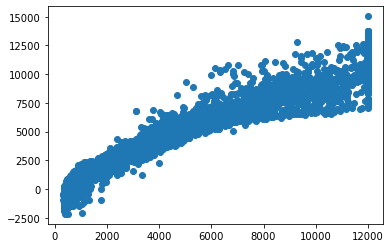

In [57]:
plt.scatter(y_test['price'], y_pred)
plt.show()

In [58]:
for i,j in np.array(lm1.params.reset_index()):
    print('({}) * {} +'.format(round(j,2),i),end=' ')

(-2271.64) * Intercept + (9040.8) * carat + (-6.6) * depth + (-22.58) * table + (-1145.18) * x + (921.56) * y + (-325.05) * z + (416.06) * cut_Good + (632.45) * cut_Ideal + (623.83) * cut_Premium + (523.37) * cut_Very_Good + (-201.64) * color_E + (-270.79) * color_F + (-438.92) * color_G + (-874.36) * color_H + (-1341.34) * color_I + (-1901.32) * color_J + (4133.78) * clarity_IF + (2630.96) * clarity_SI1 + (1815.87) * clarity_SI2 + (3439.66) * clarity_VS1 + (3156.3) * clarity_VS2 + (3879.92) * clarity_VVS1 + (3850.15) * clarity_VVS2 + 

##### The final Linear Regression equation is

price = b0 + b1 *  carat + b2 * depth + b3 * table + b4 * x + b5 * y + b6 * z + b7 * cut_Good + b8 * cut_Ideal + b9 * cut_Premium + b10 * cut_Very_Good + b11 * color_E + b12 * color_F + b13 * color_G + b14 * color_H + b15 * color_I + b16 * color_J + b17 * clarity_IF + b18 * clarity_SI1 + b19 * clarity_SI2 + b20 * clarity_VS1 + b21 * clarity_VS2 + b22 * clarity_VVS1 + b23 * clarity_VVS2 

price = (-2591.8) * Intercept + (9060.41) * carat + (-2.79) * depth + (-21.23) * table + (-1121.06) * x + (915.82) * y + (-367.38) * z + (425.69) * cut_Good + (648.86) * cut_Ideal + (635.21) * cut_Premium + (539.18) * cut_Very_Good + (-201.82) * color_E + (-270.31) * color_F + (-430.96) * color_G + (-869.21) * color_H + (-1334.07) * color_I + (-1899.66) * color_J + (4150.61) * clarity_IF + (2655.11) * clarity_SI1 + (1832.65) * clarity_SI2 + (3466.69) * clarity_VS1 + (3173.75) * clarity_VS2 + (3900.67) * clarity_VVS1 + (3869.1) * clarity_VVS2

when carat increases by 1 unit, price increases by 9060.41 keeping other predictors constant
Similarly, when depth increases by 1 unit, price decreases by 2.79  keeping other predictors constant

### Testing for multicollinearity with Variation Inflation Factor (VIF)

In [59]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = [variance_inflation_factor(df.values , ix) for ix in range( df.shape [1])]
i=0
for column in df.columns:
    if (i < 12):
        print (column ,"------>", vif[i])
    i=i+1

Unnamed: 0 ------> 4.004704518013347
carat ------> 211.71276246801057
depth ------> 1097.8009012547943
table ------> 874.6650574338905
x ------> 11750.812039214312
y ------> 11268.65390447232
z ------> 2104.5584415980056
price ------> 36.31018038962774
cut_Good ------> 4.482543666519543
cut_Ideal ------> 17.615587313909376
cut_Premium ------> 10.769371828516562
cut_Very Good ------> 9.938612073263485
